# Linear Regression

### Code-Along 1

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../assets/Advertising.csv", index_col = 0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


---
## Data Exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.shape # 200 samples, 3 features, 1 label

(200, 4)

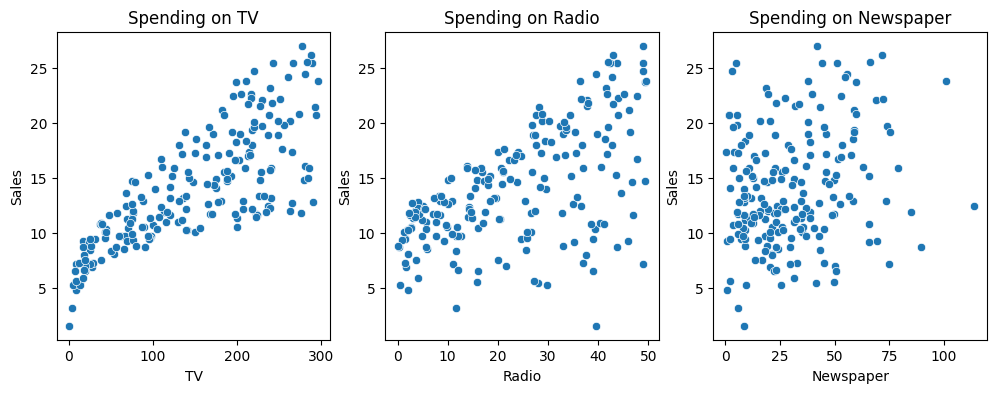

In [5]:
number_features = df.shape[1] - 1

fig, ax = plt.subplots(1, number_features, figsize = (12, 4)) # dpi = 150

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(df, x = feature, y = "Sales", ax = ax[i])
    ax[i].set_title(f"Spending on {feature}")

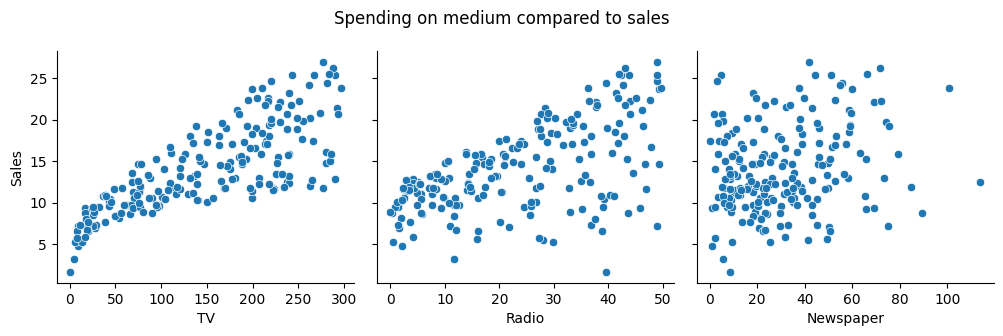

In [6]:
sns.pairplot(df, y_vars="Sales", x_vars = df.columns[:-1], height = 3.38);
plt.suptitle("Spending on medium compared to sales")
plt.tight_layout()

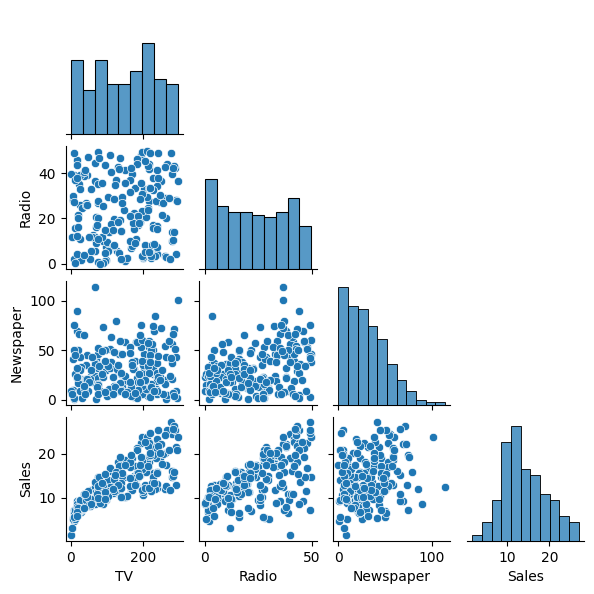

In [7]:
sns.pairplot(df, height = 1.5, corner = True);

---
## Simple Linear Regression

In [8]:
X, y = df["TV"], df["Sales"]

In [9]:
X

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

In [10]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [11]:
beta_1, beta_0 = np.polyfit(X, y, deg = 1)

beta_1, beta_0

(0.04753664043301972, 7.032593549127696)

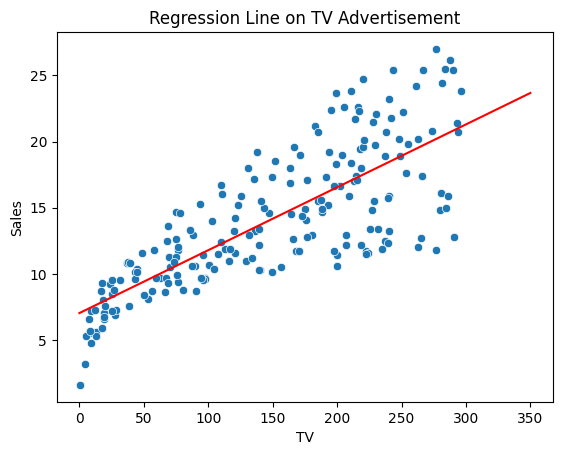

In [12]:
y_hat = lambda x: beta_0 + beta_1 * x

spending = np.linspace(0, 350)

ax = sns.scatterplot(df, x = "TV", y = "Sales")
sns.lineplot(x = spending, y = y_hat(spending), color = "red")
ax.set(title = "Regression Line on TV Advertisement");

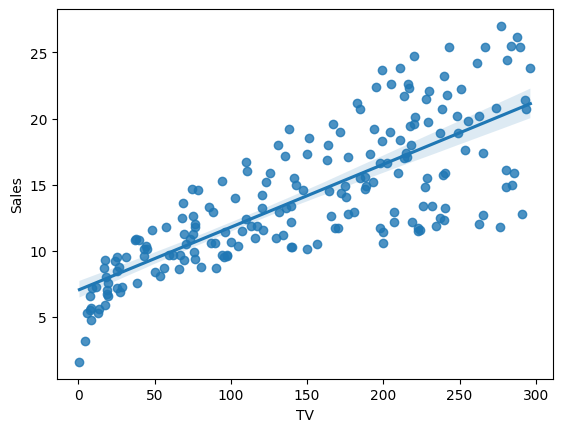

In [13]:
sns.regplot(x = X, y = y);

---
## Multiple Linear Regression

In [14]:
X = df.drop("Sales", axis = "columns")
y = df["Sales"]

In [15]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [16]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [17]:
X.insert(0, "Intercept", 1) # column index 0, name "Intercept", values 1

X.head()

,Intercept,TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4


In [18]:
X.T # transponate

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
Intercept,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TV,230.1,44.5,17.2,151.5,180.8,8.7,57.5,120.2,8.6,199.8,...,39.5,75.5,17.2,166.8,149.7,38.2,94.2,177.0,283.6,232.1
Radio,37.8,39.3,45.9,41.3,10.8,48.9,32.8,19.6,2.1,2.6,...,41.1,10.8,4.1,42.0,35.6,3.7,4.9,9.3,42.0,8.6
Newspaper,69.2,45.1,69.3,58.5,58.4,75.0,23.5,11.6,1.0,21.2,...,5.8,6.0,31.6,3.6,6.0,13.8,8.1,6.4,66.2,8.7


In [19]:
# @ operator - matmul operator
# in numpy - the matmul operator is overloaded to handle matrix multiplication
X.T @ X # matrix multiplication between X.T and X

,Intercept,TV,Radio,Newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


In [20]:
np.linalg.inv(X.T @ X)

array([[ 3.42444998e-02, -9.35348333e-05, -3.92647297e-04,
        -2.08036831e-04],
       [-9.35348333e-05,  6.84890750e-07, -1.57355890e-07,
        -1.14959987e-07],
       [-3.92647297e-04, -1.57355890e-07,  2.61016474e-05,
        -6.26574016e-06],
       [-2.08036831e-04, -1.14959987e-07, -6.26574016e-06,
         1.21328472e-05]])

In [21]:
np.linalg.inv(X.T @ X) @ X.T

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,-0.016516,0.005269,0.000196,-0.008313,0.000943,-0.001372,0.011099,0.012892,0.032408,0.010125,...,0.013205,0.021694,0.024452,0.001403,0.005016,0.026348,0.021824,0.012706,-0.022545,0.007348
1,0.000050,-0.000074,-0.000097,-0.000003,0.000022,-0.000104,-0.000062,-0.000016,-0.000088,0.000040,...,-0.000074,-0.000044,-0.000086,0.000014,0.000003,-0.000070,-0.000031,0.000025,0.000086,0.000063
2,0.000124,0.000344,0.000368,0.000295,-0.000505,0.000412,0.000307,0.000027,-0.000345,-0.000489,...,0.000638,-0.000160,-0.000486,0.000655,0.000475,-0.000389,-0.000330,-0.000218,0.000244,-0.000259
3,0.000368,0.000088,0.000343,0.000226,0.000412,0.000395,-0.000135,-0.000204,-0.000210,0.000010,...,-0.000400,-0.000212,0.000148,-0.000447,-0.000376,-0.000068,-0.000151,-0.000209,0.000299,-0.000183


In [22]:
# normal equation
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [23]:
# function for using normal equation
regression_fit = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y

beta_hat = regression_fit(X, y)

beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [24]:
predict = lambda x, beta: np.dot(x, beta) # scalar multiplication (dot product)

test_sample = [1, 230, 38, 69] # 1 for dummy value

y_hat = predict(test_sample, beta_hat)

print(f"With spendings of $230k on TV, $38k on Radio, and $69k on Newspaper commercials, we get predicted sales of {y_hat:.1f}k units")

With spendings of $230k on TV, $38k on Radio, and $69k on Newspaper commercials, we get predicted sales of 20.6k units


---
## Train | test split

In [25]:
train_fraction = int(len(df) * 0.7) # 70% of dataframe's length

# random sampling, picking out 70% of df as a sample
train = df.sample(n = train_fraction, replace = False, random_state = 42) # replace = återläggning, random_state is seed for reproducability

train.sort_index().head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


In [26]:
test = df.drop(train.index)
test.sort_index().head() # sorting indices to note that they have been separated correctly between train and test data

,TV,Radio,Newspaper,Sales
2,44.5,39.3,45.1,10.4
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
14,97.5,7.6,7.2,9.7
15,204.1,32.9,46.0,19.0


In [27]:
train.shape, test.shape

((140, 4), (60, 4))

In [28]:
X_train = train.drop("Sales", axis = "columns")
y_train = train["Sales"]

X_test = test.drop("Sales", axis = "columns")
y_test = test["Sales"]

# inserting column of 1s first for X
X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 4), (140,), (60, 4), (60,))

---
## Prediction

In [29]:
beta_hat = regression_fit(X_train, y_train)

print(f"Beta parameters:\n{beta_hat}")

beta_hat = np.reshape(beta_hat.to_numpy(), (4, 1))

predict = lambda X, weights: X @ weights

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5]

Beta parameters:
0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [30]:
X_test.iloc[0]

Intercept     1.0
TV           44.5
Radio        39.3
Newspaper    45.1
Name: 2, dtype: float64

In [31]:
i = 0
print(f"{X_test.iloc[i]}\n\nGives prediction:\n{y_hat[i]}")

Intercept     1.0
TV           44.5
Radio        39.3
Newspaper    45.1
Name: 2, dtype: float64

Gives prediction:
[12.17324122]


---
## Evaluate Model Performance

In [32]:
m = len(y_test)

m

60

In [33]:
# remove extra dimension (60, 1) -> (60,)
y_hat = np.reshape(y_hat, (m))

# MAE
mean_absolute_error = 1 / m * np.sum(np.abs(y_test - y_hat)) # sum absolute difference between y_test and y_hat

# MSE
mean_squared_error = 1 / m * np.sum((y_test - y_hat)**2) # square every value before summing

# RMSE
root_mean_squared_error = np.sqrt(mean_squared_error)

# in this case k units, k**2 units, k units respectively
mean_absolute_error, mean_squared_error, root_mean_squared_error

(1.3244490959726523, 3.540425618238498, 1.8816018755939041)